Classfication Problem : Whether the person can have heart diease or not in future.
** Provide the best performing model to determine probability for a patient having a heart disease or attack.

In [ ]:
# Step 1 : load the dataset.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/heartdisease_u5z_lx9fv.csv')
print(df.head())

   HeartDiseaseorAttack  HighBP  HighChol  BMI  Smoker  Diabetes  \
0                     0       1         1   40       1         0   
1                     0       0         0   25       1         0   
2                     0       1         1   28       0         0   
3                     0       1         0   27       0         0   
4                     0       1         1   24       0         0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  MentHlth  PhysHlth  Sex  \
0             0       0        1                  0        18        15    0   
1             1       0        0                  0         0         0    0   
2             0       1        0                  0        30        30    0   
3             1       1        1                  0         0         0    0   
4             1       1        1                  0         3         0    0   

   Age  Education  Income  
0    9          4       3  
1    7          6       1  
2    9          4       8 

In [ ]:
df.dropna(inplace=True)
# Step 2: Splitting data into features (a) and target (b)
a = df.drop('HeartDiseaseorAttack', axis=1)
b = df['HeartDiseaseorAttack']
print("Features (a):", a.shape)
print("Target (b):", b.shape)

Features (a): (253680, 15)
Target (b): (253680,)


Question : Including univariate analysis to understand the distribution of features.

In [ ]:
# function for plot univariate analysis
def univariate_analysis(column):
    plt.figure(figsize=(10, 5))

    # categorize numeric vs categorical
    if df[column].dtype == 'object' or df[column].nunique() < 20:
        sns.countplot(data=df, x=column) # counts the categories and returns a count of their occurrences
        plt.title(f'Distribution of {column} (Categorical)')
    else:
        sns.histplot(data=df, x=column, kde=True) #Histplot is used to visualize the univariate set of distributions(single variable)
        plt.title(f'Distribution of {column} (Continuous)')

    plt.xticks(rotation=45)
    plt.show()

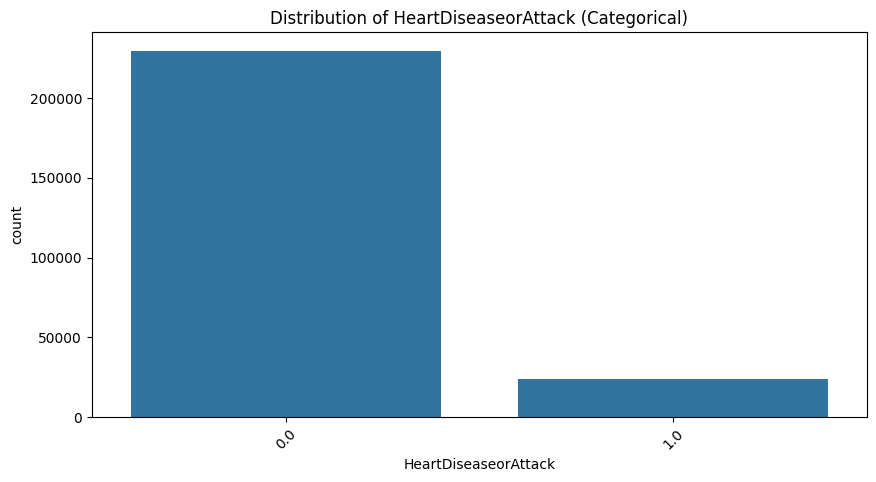

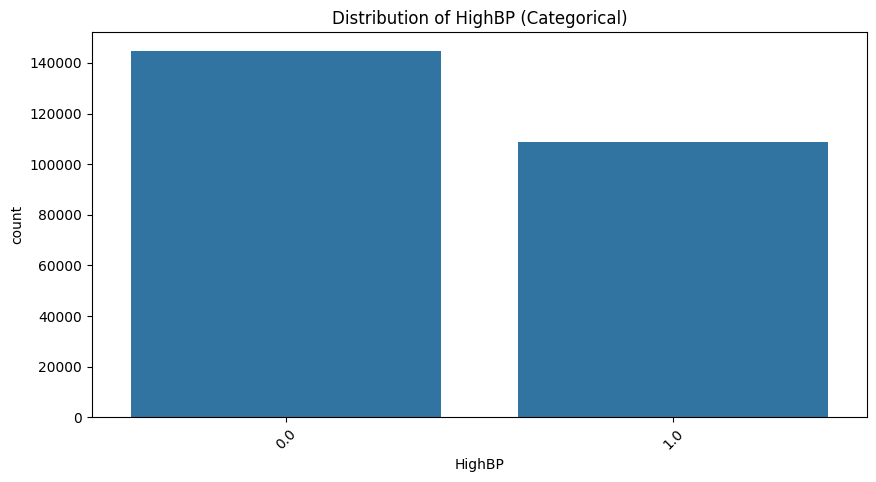

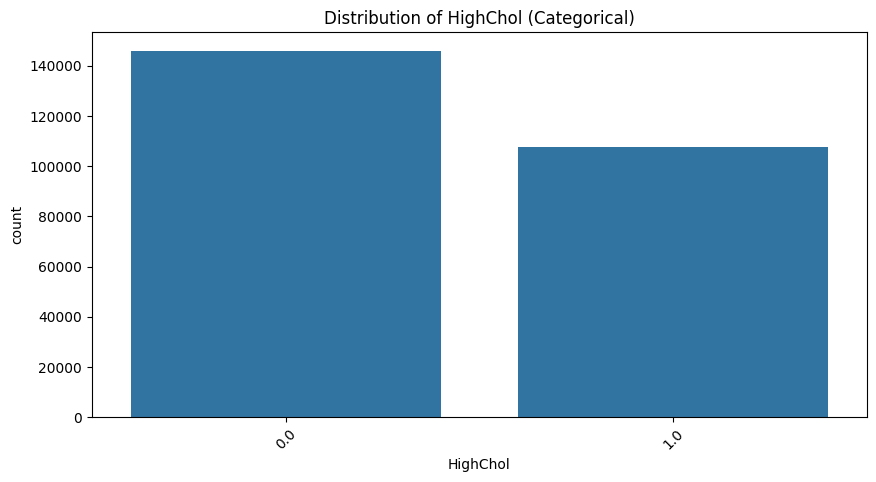

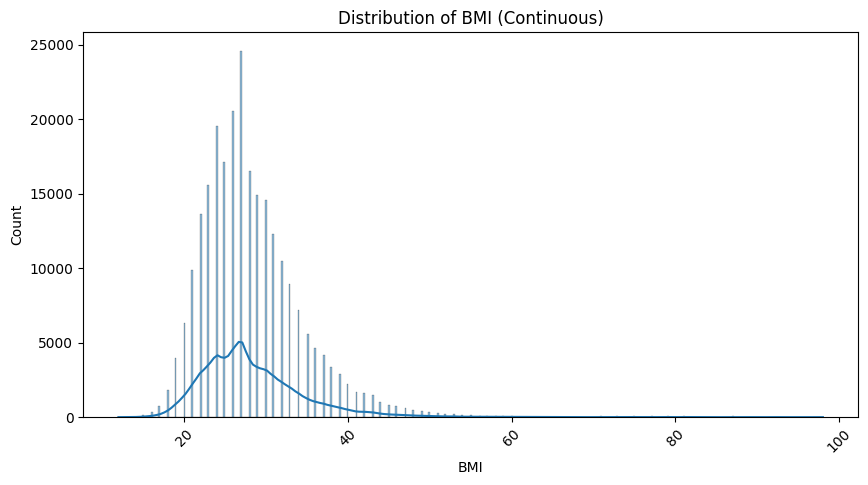

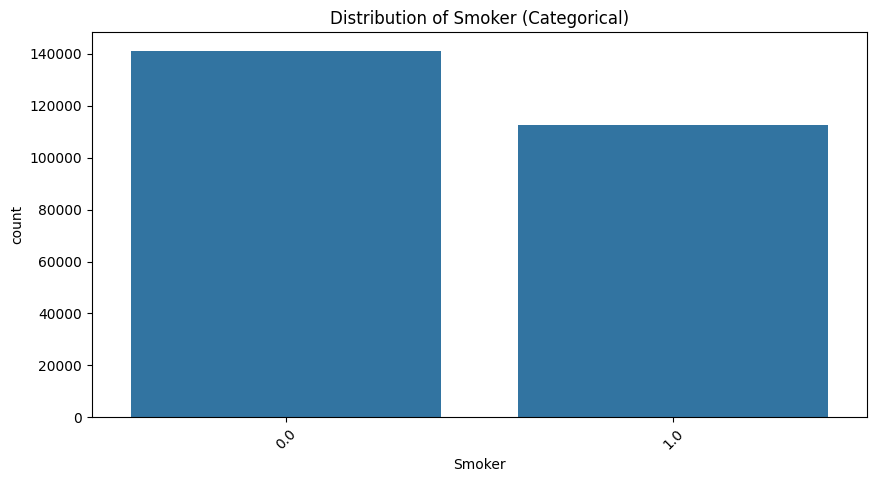

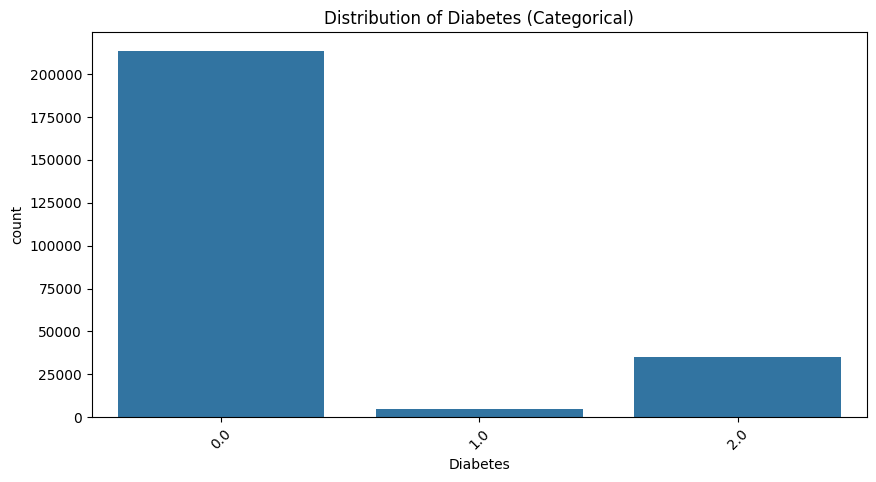

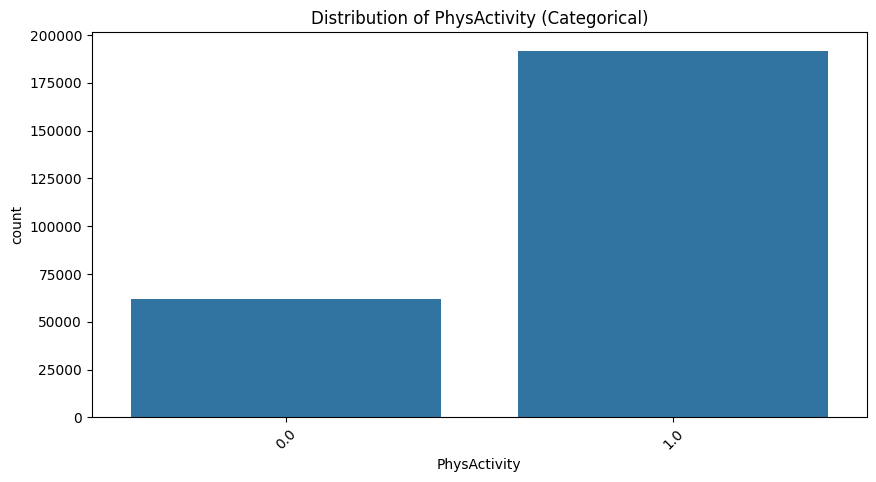

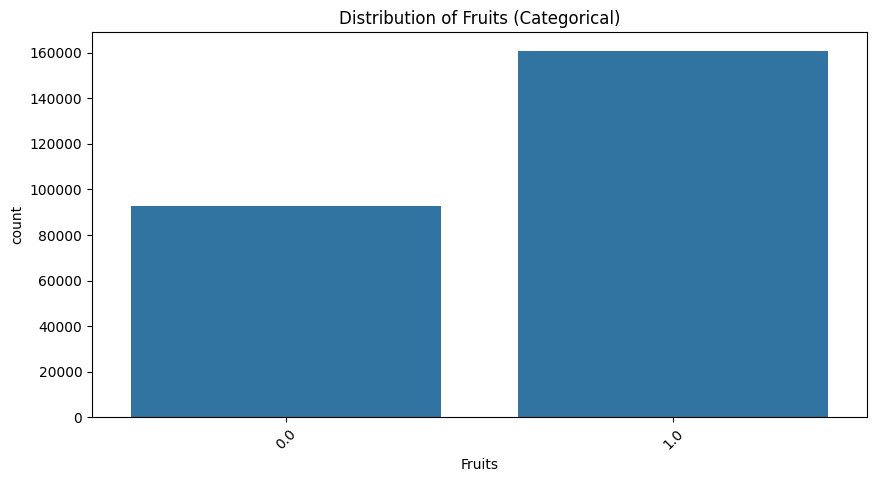

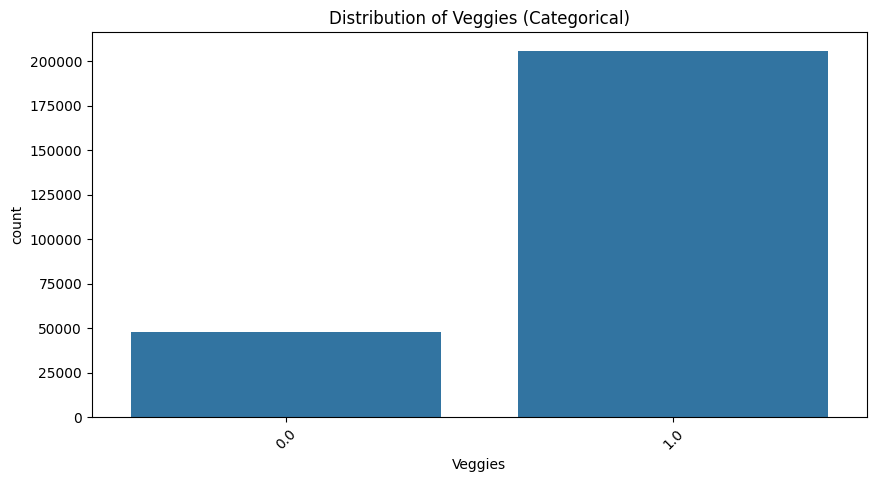

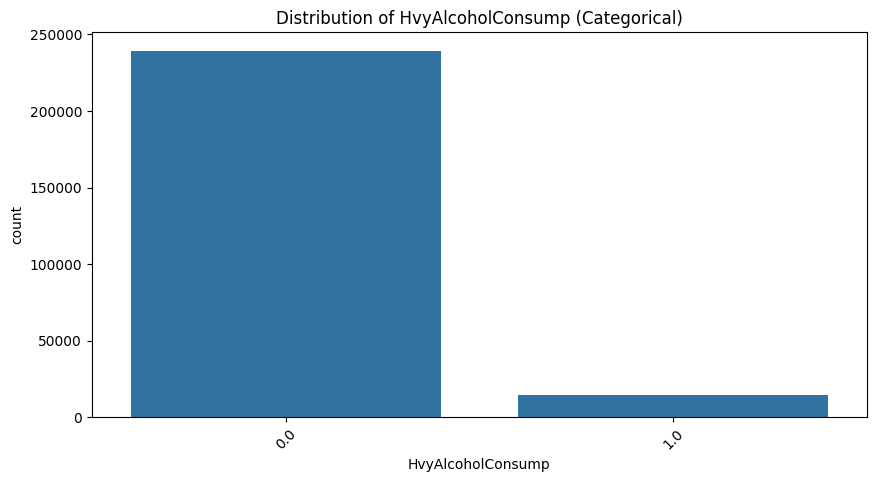

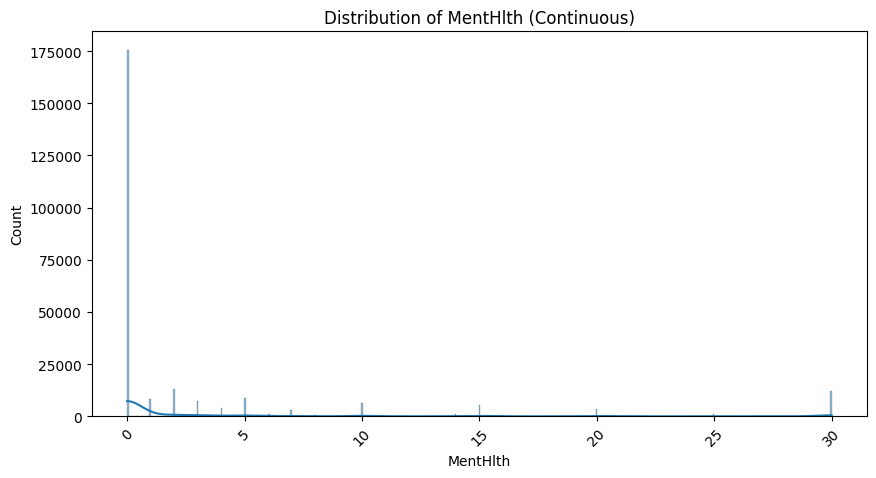

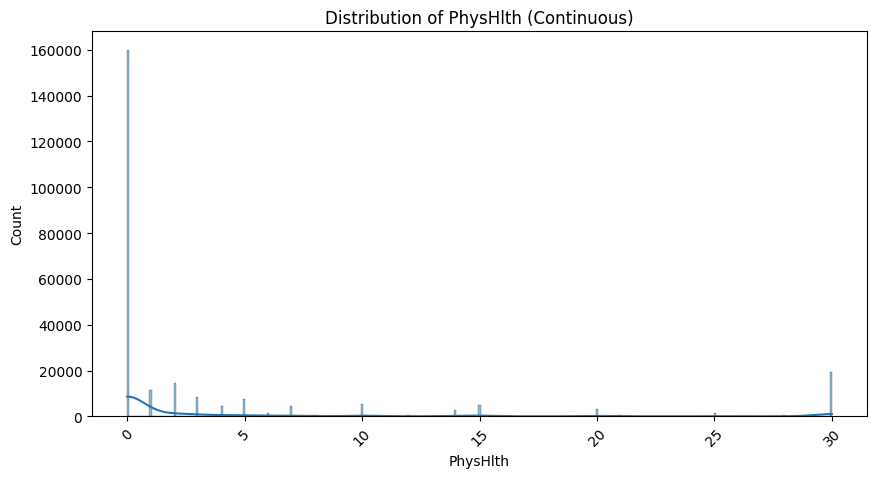

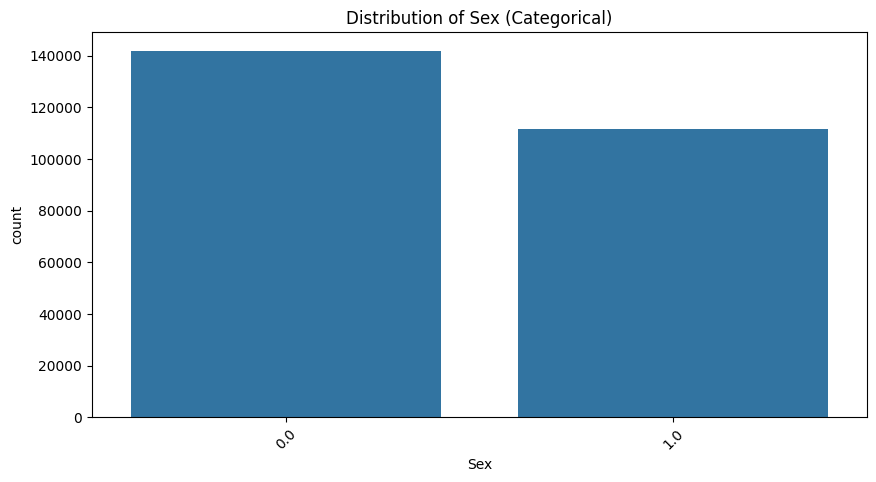

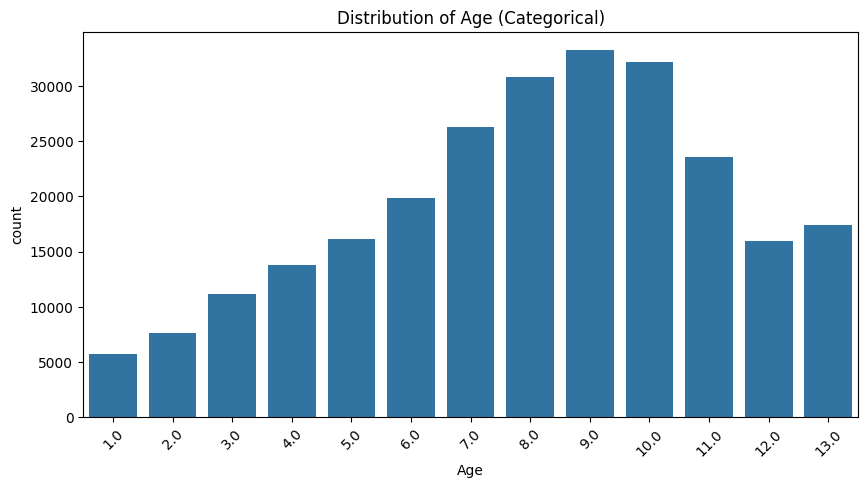

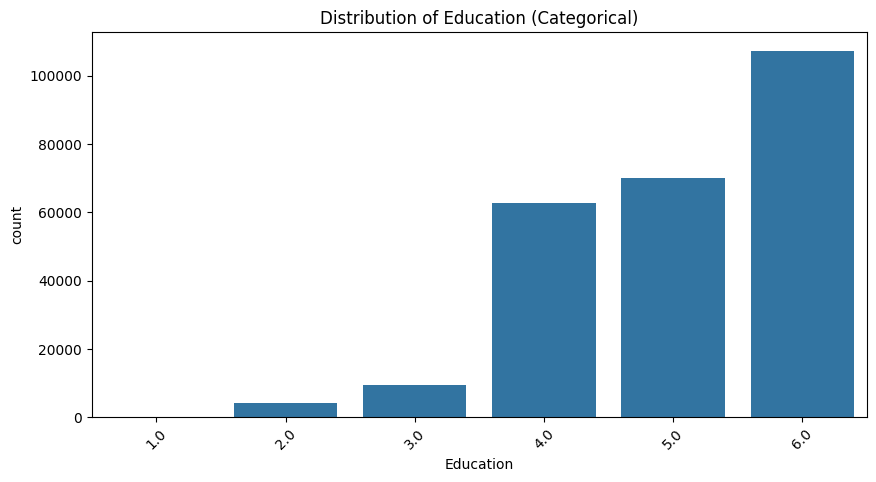

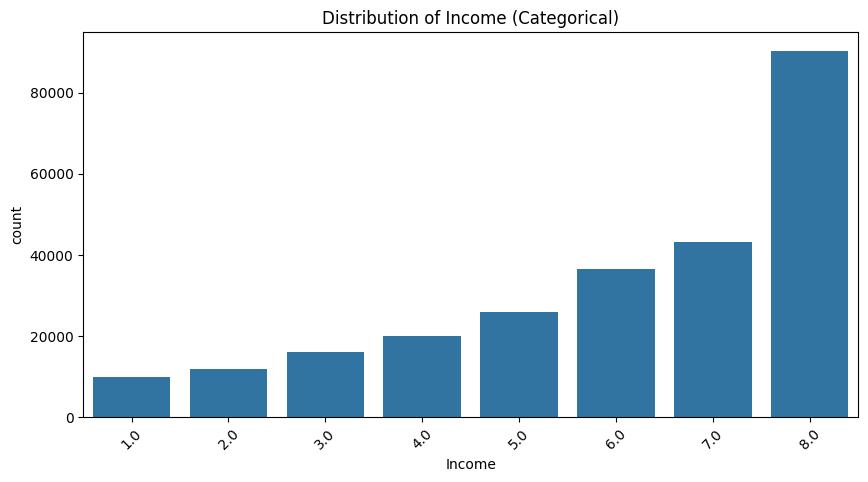

In [ ]:
# Generate individual graphs for each column manually
univariate_analysis('HeartDiseaseorAttack')
univariate_analysis('HighBP')
univariate_analysis('HighChol')
univariate_analysis('BMI')
univariate_analysis('Smoker')
univariate_analysis('Diabetes')
univariate_analysis('PhysActivity')
univariate_analysis('Fruits')
univariate_analysis('Veggies')
univariate_analysis('HvyAlcoholConsump')
univariate_analysis('MentHlth')
univariate_analysis('PhysHlth')
univariate_analysis('Sex')
univariate_analysis('Age')
univariate_analysis('Education')
univariate_analysis('Income')

Questions: Including multivariate analysis to determine the correlations and analysis of target variables.

In [ ]:
# Step 1 : Compute the correlation matrix
corr_matrix = df.corr()

# Step 2: Plot the heatmap for multivariate correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlations between Features')
plt.show()

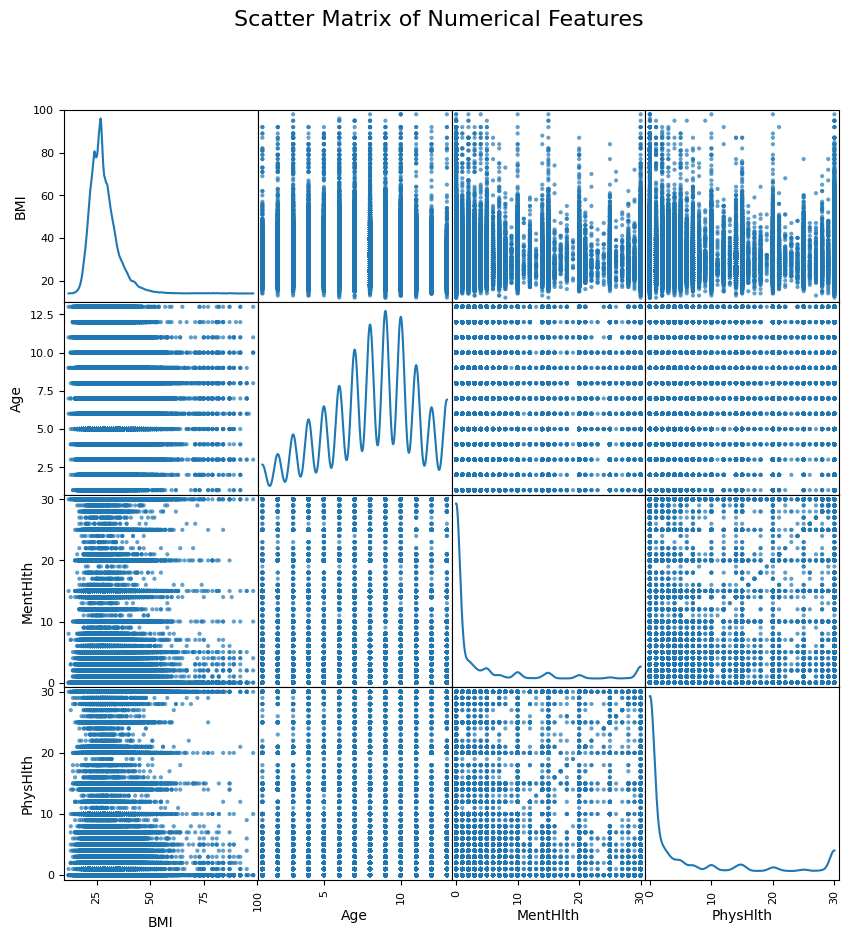

In [ ]:
from pandas.plotting import scatter_matrix

# Select numerical features for scatter matrix
numerical_features = ['BMI', 'Age', 'MentHlth', 'PhysHlth']

# Create a scatter matrix
scatter_matrix(df[numerical_features], figsize=(10, 10), diagonal='kde', alpha=0.7)
plt.suptitle('Scatter Matrix of Numerical Features', fontsize=16)
plt.show()

In [ ]:
# Linear Regression Analysis : Using linear regression, we can assess how #
# predictors influence a continuous target variable.

import statsmodels.api as sm

# Define the dependent (target) and independent (predictor) variables
X = df[['BMI', 'HighChol', 'Age']]  # Example predictor variables
y = df['MentHlth']  # Example continuous target variable

# Add a constant to the model to estimate the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

'''The output provides:

Coefficients: Indicate how each predictor affects the target variable.
P-values: Variables with p < 0.05 are statistically significant, meaning their influence on the target is likely meaningful.'''

In [ ]:
'''
Logistic Regression Analysis : When the target variable is binary (like Yes/No), logistic regression is suitable. For example, predicting the presence of heart disease.'''
import statsmodels.api as sm

# Define independent variables and binary target
X = df[['BMI', 'HighChol', 'PhysActivity']]
y = df['HeartDiseaseorAttack']  # Example binary target

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X).fit()

# Print the model summary
print(logit_model.summary())



In [ ]:
'''Principal Component Analysis (PCA)
PCA reduces dimensionality, capturing major patterns. Use it to simplify feature space and visualize influential components.'''
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select numerical features for PCA
features = df[['BMI', 'HighChol', 'Age', 'MentHlth', 'PhysHlth']]

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Plot PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['HeartDiseaseorAttack'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Health Data with HeartDiseaseorAttack Label')
plt.colorbar(label='HeartDiseaseorAttack')
plt.show()

'''Variables with p < 0.05 are statistically significant, meaning they likely have a real effect on the target variable.'''

In [ ]:
import seaborn as sns

# Visualize pairwise relationships among numerical variables, colored by binary target
sns.pairplot(df[['BMI', 'HighChol', 'MentHlth', 'Age', 'HeartDiseaseorAttack']], hue='HeartDiseaseorAttack', diag_kind='kde', palette='coolwarm')
plt.show()

Question : To determine if new features can be created, based on the given data.
     feature engineering: involves deriving new variables from the existing data to help improve predictive power or reveal hidden relationships.

In [ ]:
# Age Group: Group Age into categories, like 20-30, 30-40, etc., to identify age-related trends.
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])


In [ ]:
#BMI Category: Based on BMI values, classify into groups (e.g., Underweight, Normal, Overweight, Obese).
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


In [ ]:
#Useful for analyses where one want to consider BMI only for smokers and ignore it for non-smokers.
# Multiply BMI and Smoker columns to create a new column
df['BMI_Smoker'] = df['BMI'] * df['Smoker']

# Display the updated DataFrame
print(df[['BMI', 'Smoker', 'BMI_Smoker']].head())

Question: Layout binary classification experimentation space (i.e.determine
the list of models you would like to experiment with)
1. Logistic Regression : can be applied to predict the binary target variable (HeartDiseaseorAttack)
2. Random Forest : Random Forest will building multiple decision trees and aggregating their results, which makees robust predictions and reduces overfitting.
3. SVM :

1. Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

log_reg = LogisticRegression()
log_reg.fit(a_train, b_train)

# Predict and evaluate
b_pred_log_Logistic = log_reg.predict(a_test)
print("Logistic Regression Accuracy:", accuracy_score(b_test, b_pred_log_Logistic))
print("Classification Report for Logistic Regression:\n", classification_report(b_test, b_pred_log_Logistic))

Logistic Regression Accuracy: 0.9068774308840534
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     69007
           1       0.51      0.07      0.12      7097

    accuracy                           0.91     76104
   macro avg       0.71      0.53      0.54     76104
weighted avg       0.87      0.91      0.87     76104



2. Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split into train and test sets
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier with default settings
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(a_train, b_train)

# Predict on the test set
b_pred_rf = rf_model.predict(a_test)

# Evaluate accuracy and display a classification report
accuracy = accuracy_score(b_test, b_pred_rf)
print(f"Random Forest Accuracy: {accuracy}")

# Display more detailed performance metrics
print(classification_report(b_test, b_pred_rf))

Random Forest Accuracy: 0.8972130242825607
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     45968
           1       0.31      0.08      0.13      4768

    accuracy                           0.90     50736
   macro avg       0.61      0.53      0.54     50736
weighted avg       0.86      0.90      0.87     50736



3. SVM : Support Vector Machine - SVM works by finding the hyperplane that best separates classes in a high-dimensional space, making it effective for binary classification tasks like heart disease prediction.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
#svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
# Train the model
svm_model.fit(a_train, b_train)

# Predict on the test set
b_pred_svm = svm_model.predict(a_test)

# Evaluate accuracy and display a classification report
accuracy = accuracy_score(b_test, b_pred_svm)
print(f"SVM Accuracy: {accuracy}")

# Display more detailed performance metrics
print(classification_report(b_test, b_pred_svm))

Question : Using precision-recall curves to determine best threshold:
So create common function for this and call for each model to find best threshold.

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, accuracy_score
import numpy as np
def ploting_precisionrecall_curve(y_true, y_scores, model_name):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[np.argmax(f1_scores)]

    plt.plot(recall, precision, marker='.', label=model_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend()

    print(f"\n{model_name} Best Threshold (Max F1 Score): {best_threshold:.2f}")
    print(f"Max F1 Score for {model_name}: {np.max(f1_scores):.2f}")
    return best_threshold

In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(a_train, b_train)
b_pred_proba_log = log_reg.predict_proba(a_test)[:, 1]
plt.figure(figsize=(6, 4))
threshold_log = ploting_precisionrecall_curve(b_test, b_pred_proba_log, "Logistic Regression")
plt.show()

# Classification report for Logistic Regression at best threshold
b_pred_log_thresholded = (b_pred_proba_log >= threshold_log).astype(int)
print(f"\nClassification Report for Logistic Regression:\n", classification_report(b_test, b_pred_log_thresholded))
print(f"Logistic Regression Accuracy at best threshold: {accuracy_score(b_test, b_pred_log_thresholded):.2f}")

In [ ]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(a_train, b_train)
b_pred_proba_rf = rf.predict_proba(a_test)[:, 1]

plt.figure(figsize=(6, 4))
threshold_rf = ploting_precisionrecall_curve(b_test, b_pred_proba_rf, "Random Forest")
plt.show()

# Classification report for Random Forest at best threshold
b_pred_rf_thresholded = (b_pred_proba_rf >= threshold_rf).astype(int)
print(f"\nClassification Report for Random Forest:\n", classification_report(b_test, b_pred_rf_thresholded))
print(f"Random Forest Accuracy at best threshold: {accuracy_score(b_test, b_pred_rf_thresholded):.2f}")

In [ ]:
# SVM Model
svm = SVC(probability=True, random_state=42)
svm.fit(a_train, b_train)
b_pred_proba_svm = svm.predict_proba(a_test)[:, 1]
plt.figure(figsize=(6, 4))
threshold_svm = ploting_precisionrecall_curve(b_test, b_pred_proba_svm, "SVM")
plt.show()

# Classification report for SVM at best threshold
b_pred_svm_thresholded = (b_pred_proba_svm >= threshold_svm).astype(int)
print(f"\nClassification Report for SVM:\n", classification_report(b_test, b_pred_svm_thresholded))
print(f"SVM Accuracy at best threshold: {accuracy_score(b_test, b_pred_svm_thresholded):.2f}")

Question : Publish the performance of all the models on the same hold-out/ test dataset.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def model_evaluate(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"-------------------{model_name} Performance:----------------------")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("="*50)

In [ ]:
# Evaluate each model
model_evaluate(b_test, b_pred_log_Logistic, "Logistic Regression")
model_evaluate(b_test, b_pred_svm, "SVM ")
model_evaluate(b_test, b_pred_rf, "Random Forest")

Question : List out the most important drivers of heart disease or attack.

In [ ]:
# Used above Random Forest Model to determine feature importance
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances based on Random Forest:")
print(feature_importances)

In [ ]:
# Extract coefficients from trained logistic regression model
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Feature Coefficients based on Logistic Regression:")
print(feature_coefficients)

From the output of Random Forest and Logistic Regression following are key drivers:

BMI: Higher BMI is frequently associated with heart disease.
HighBP (High Blood Pressure): Strongly correlated with cardiovascular issues.
HighChol (High Cholesterol): Elevated cholesterol levels increase heart disease risk.
Smoker: Smoking status has a known impact on heart health.
Diabetes: Often linked with increased cardiovascular risks.
PhysActiv (Physical Activity): Regular physical activity is protective, while inactivity is a risk.

Using techniques such as oversampling, undersampling to handle
class-imbalance:
Oversampling duplicates instances from the minority class to balance the class distribution.
Undersampling removes instances from the majority class to achieve a balanced dataset.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(a_train, b_train)

# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(y_train_over.value_counts())

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# Apply Random Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(a_train, b_train)

# Check the class distribution after undersampling
print("Class distribution after undersampling:")
print(y_train_under.value_counts())

In [ ]:
#Logistic Regression, Random Forest, and SVM, can directly handle imbalanced classes by setting class_weight='balanced'.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Random Forest with class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Logistic Regression with class weights
log_reg_model = LogisticRegression(class_weight='balanced', random_state=42)
log_reg_model.fit(X_train, y_train)

# SVM with class weights
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)



In [ ]:
from sklearn.metrics import classification_report

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

# Evaluate each model
print("Random Forest with Oversampling:")
evaluate_model(rf_model, a_test, b_test)

print("Logistic Regression with Class Weights:")
evaluate_model(log_reg_model, a_test, b_test)

print("SVM with Class Weights:")
evaluate_model(svm_model, a_test, b_test)

Additional: Using model pipeline to create end to end training and inference pipelines.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define a pipeline with placeholder for the classifier
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))  # Placeholder for model
])

# Define a parameter grid
param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [50, 100]
    },
    {
        'classifier': [LogisticRegression(max_iter=1000, random_state=42)],
        'classifier__C': [0.1, 1, 10]
    },
    {
        'classifier': [SVC(random_state=42)],
        'classifier__C': [0.1, 1, 10]
    }
]

# Use GridSearchCV to select the best model and hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(a_train, a_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(a_test)

print("Best Model Performance:")
print(classification_report(b_test, b_pred))
print("Best Parameters:", grid_search.best_params_)
